In [1]:
# Import the dependencies

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

# Import the requests library

import requests

# Import the API key

from config import weather_api_key

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combination

lats = np.random.uniform(-90.000, 90.000, size=1500)

lngs = np.random.uniform(-180.000, 180.000, size=1500)

lats_lngs = zip(lats, lngs)

lats_lngs

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
coordinates = list(lats_lngs)

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:

    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)

# Print the city count to confirm sufficient count.

len(cities)

627

In [6]:
# Import the time library and the satetime module from the datetime library

import time

from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | tevaitoa
Processing Record 4 of Set 1 | ngaoundere
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | gat
Processing Record 7 of Set 1 | zemio
Processing Record 8 of Set 1 | porto novo
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | kupang
Processing Record 11 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 12 of Set 1 | vostok
Processing Record 13 of Set 1 | ustye
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | lavrentiya
Processing Record 16 of Set 1 | kahului
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | soyo
Processing Record 22 o

Processing Record 41 of Set 4 | muyezerskiy
Processing Record 42 of Set 4 | pascagoula
Processing Record 43 of Set 4 | urengoy
Processing Record 44 of Set 4 | damghan
Processing Record 45 of Set 4 | saint-philippe
Processing Record 46 of Set 4 | kieta
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | meyungs
City not found. Skipping...
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | naftah
City not found. Skipping...
Processing Record 1 of Set 5 | maltahohe
Processing Record 2 of Set 5 | qaqortoq
Processing Record 3 of Set 5 | udachnyy
Processing Record 4 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 5 | galle
Processing Record 6 of Set 5 | pucallpa
Processing Record 7 of Set 5 | gallup
Processing Record 8 of Set 5 | knysna
Processing Record 9 of Set 5 | kodiak
Processing Record 10 of Set 5 | namatanai
Processing Record 11 of Set 5 | griffith
Processing Record 12 of Set 5 | sa

Processing Record 28 of Set 8 | coahuayana
Processing Record 29 of Set 8 | rumonge
Processing Record 30 of Set 8 | prince rupert
Processing Record 31 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 32 of Set 8 | bandarbeyla
Processing Record 33 of Set 8 | lata
Processing Record 34 of Set 8 | cortez
Processing Record 35 of Set 8 | plouzane
Processing Record 36 of Set 8 | takoradi
Processing Record 37 of Set 8 | mendi
Processing Record 38 of Set 8 | imbituba
Processing Record 39 of Set 8 | carupano
Processing Record 40 of Set 8 | charlestown
Processing Record 41 of Set 8 | yulara
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | plettenberg bay
Processing Record 44 of Set 8 | maamba
Processing Record 45 of Set 8 | taneatua
City not found. Skipping...
Processing Record 46 of Set 8 | vestmannaeyjar
Processing Record 47 of Set 8 | minsk
Processing Record 48 of Set 8 | guadalupe y calvo
Processing Record 49 of Set 8 | odweyne
Processing Record 50 of Se

Processing Record 14 of Set 12 | san ramon
Processing Record 15 of Set 12 | azua
Processing Record 16 of Set 12 | tarakan
Processing Record 17 of Set 12 | rudraprayag
Processing Record 18 of Set 12 | ancud
Processing Record 19 of Set 12 | raahe
Processing Record 20 of Set 12 | palencia
Processing Record 21 of Set 12 | severobaykalsk
Processing Record 22 of Set 12 | wajima
Processing Record 23 of Set 12 | menomonie
Processing Record 24 of Set 12 | crotone
Processing Record 25 of Set 12 | grand centre
City not found. Skipping...
Processing Record 26 of Set 12 | sao paulo de olivenca
Processing Record 27 of Set 12 | pitimbu
Processing Record 28 of Set 12 | kandrian
Processing Record 29 of Set 12 | wagar
Processing Record 30 of Set 12 | bargal
City not found. Skipping...
Processing Record 31 of Set 12 | soderhamn
Processing Record 32 of Set 12 | kiama
Processing Record 33 of Set 12 | sinnai
Processing Record 34 of Set 12 | salalah
Processing Record 35 of Set 12 | sao filipe
Processing Reco

In [8]:
# Convert  the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,67.84,56,4,9.84,ZA,2022-07-18 16:38:21
1,Bluff,-46.6000,168.3333,44.80,82,100,8.63,NZ,2022-07-18 16:38:16
2,Tevaitoa,-16.7833,-151.5000,76.62,66,31,9.91,PF,2022-07-18 16:43:03
3,Ngaoundere,7.3167,13.5833,67.51,95,89,3.91,CM,2022-07-18 16:43:03
4,Albany,42.6001,-73.9662,73.63,93,100,5.01,US,2022-07-18 16:37:08
5,Gat,31.6100,34.7642,86.40,100,0,8.25,IL,2022-07-18 16:43:04
6,Zemio,5.0314,25.1361,71.22,94,99,3.11,CF,2022-07-18 16:43:04
7,Porto Novo,6.4965,2.6036,82.22,70,38,11.01,BJ,2022-07-18 16:43:04
8,Rikitea,-23.1203,-134.9692,74.16,79,97,12.15,PF,2022-07-18 16:37:00
9,Kupang,-10.1667,123.5833,70.61,76,81,9.93,ID,2022-07-18 16:43:05


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-07-18 16:38:21,-33.5906,26.8910,67.84,56,4,9.84
1,Bluff,NZ,2022-07-18 16:38:16,-46.6000,168.3333,44.80,82,100,8.63
2,Tevaitoa,PF,2022-07-18 16:43:03,-16.7833,-151.5000,76.62,66,31,9.91
3,Ngaoundere,CM,2022-07-18 16:43:03,7.3167,13.5833,67.51,95,89,3.91
4,Albany,US,2022-07-18 16:37:08,42.6001,-73.9662,73.63,93,100,5.01
5,Gat,IL,2022-07-18 16:43:04,31.6100,34.7642,86.40,100,0,8.25
6,Zemio,CF,2022-07-18 16:43:04,5.0314,25.1361,71.22,94,99,3.11
7,Porto Novo,BJ,2022-07-18 16:43:04,6.4965,2.6036,82.22,70,38,11.01
8,Rikitea,PF,2022-07-18 16:37:00,-23.1203,-134.9692,74.16,79,97,12.15
9,Kupang,ID,2022-07-18 16:43:05,-10.1667,123.5833,70.61,76,81,9.93


In [11]:
# Create the output files (CSV)

output_data_file = 'weather_data/cities.csv'

# Export the city_data into a CSV

city_data_df.to_csv(output_data_file, index_label='City_ID')

In [12]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df['Lat']

max_temps = city_data_df['Max Temp']

humidity = city_data_df['Humidity']

cloudiness = city_data_df['Cloudiness']

wind_speed = city_data_df['Wind Speed']

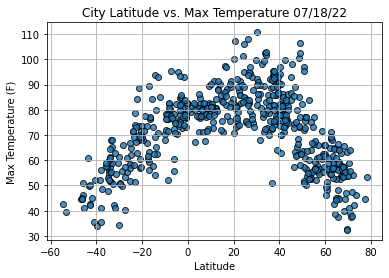

In [18]:
# import time module
import time

# Build the scatter plot for Lat vs. max_temp
plt.scatter(lats, max_temps, edgecolor='k', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show the plot
plt.show()

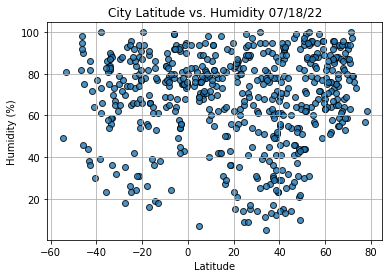

In [20]:
# Build the scatter plot for Lat vs. humidity
plt.scatter(lats, humidity, edgecolor='k', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show the plot
plt.show()

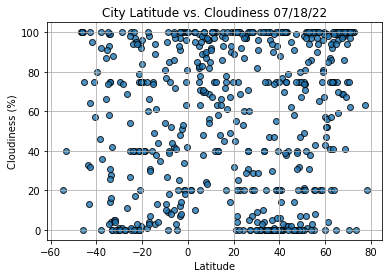

In [22]:
# Build the scatter plot for Lat vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor='k', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show the plot
plt.show()

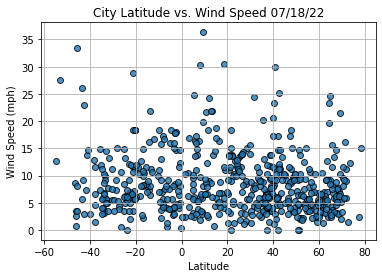

In [23]:
# Build the scatter plot for Lat vs. wind speed
plt.scatter(lats, wind_speed, edgecolor='k', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show the plot
plt.show()